<a href="https://colab.research.google.com/github/SalarShafiee/ML-Projects/blob/main/with%20all%20photos%20included%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import gc
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm


AUTOTUNE = tf.data.experimental.AUTOTUNE

In [2]:
import kagglehub

path = kagglehub.dataset_download("zygmuntyt/nutrition5k-dataset-side-angle-images")

print("Path to dataset files:", path)

100%|██████████| 5.97G/5.97G [00:51<00:00, 125MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/zygmuntyt/nutrition5k-dataset-side-angle-images/versions/2


In [3]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 5.3 MB/s eta 0:00:00


In [4]:
import pandas as pd
df=pd.read_excel('/content/sample_data/dish_metadata_cafe1 .xlsx')
df.head()

,dish_id,total_calories,total_mass,total_fat,total_carb,total_protein
0,dish_1550704750,136.949997,83.0,2.988,0.00,25.73
1,dish_1550704903,30.400000,76.0,0.152,6.84,1.52
2,dish_1550705288,77.000000,100.0,0.100,17.00,2.00
3,dish_1550705370,122.500000,49.0,7.350,0.00,12.74
4,dish_1550705445,4.000000,40.0,0.000,0.80,0.40


In [5]:
import pandas as pd
import os
from glob import glob

# Assuming df is already loaded
df['path_to_images'] = ''

base_path = "/root/.cache/kagglehub/datasets/zygmuntyt/nutrition5k-dataset-side-angle-images/versions/2"

for index, row in df.iterrows():
    dish_id = row['dish_id']
    image_folder = os.path.join(base_path, dish_id, "frames_sampled30")

    if os.path.exists(image_folder):
        # Collect all image paths within the folder
        image_paths = glob(os.path.join(image_folder, "*.jpeg"))
        if image_paths:
            df.at[index, 'path_to_images'] = image_paths  # Store list of paths
        else:
            print(f"Warning: No images found for dish_id: {dish_id}")
            df.at[index, 'path_to_images'] = []
    else:
        print(f"Warning: Folder not found for dish_id: {dish_id}")
        df.at[index, 'path_to_images'] = []

df.head()

,dish_id,total_calories,total_mass,total_fat,total_carb,total_protein,path_to_images
0,dish_1550704750,136.949997,83.0,2.988,0.00,25.73,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
1,dish_1550704903,30.400000,76.0,0.152,6.84,1.52,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
2,dish_1550705288,77.000000,100.0,0.100,17.00,2.00,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
3,dish_1550705370,122.500000,49.0,7.350,0.00,12.74,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...
4,dish_1550705445,4.000000,40.0,0.000,0.80,0.40,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...


In [6]:
import pandas as pd
import os
from glob import glob
from PIL import Image

# Assuming df is already loaded with dish_id
df['combined_image_path'] = ''

base_path = "/root/.cache/kagglehub/datasets/zygmuntyt/nutrition5k-dataset-side-angle-images/versions/2"

def combine_images(image_paths, output_path):
    images = [Image.open(img) for img in image_paths]
    widths, heights = zip(*(i.size for i in images))

    total_width = max(widths) * 5  # 5 images per row
    total_height = max(heights) * 4  # 4 rows

    new_image = Image.new('RGB', (total_width, total_height))

    x_offset, y_offset = 0, 0
    for i, img in enumerate(images):
        new_image.paste(img, (x_offset, y_offset))
        x_offset += img.size[0]
        if (i + 1) % 5 == 0:
            x_offset = 0
            y_offset += img.size[1]

    new_image.save(output_path)

for index, row in df.iterrows():
    dish_id = row['dish_id']
    image_folder = os.path.join(base_path, dish_id, "frames_sampled30")

    if os.path.exists(image_folder):
        image_paths = sorted(glob(os.path.join(image_folder, "*.jpeg")))
        if image_paths:
            output_image_path = os.path.join(image_folder, f"{dish_id}_combined.jpeg")
            combine_images(image_paths, output_image_path)
            df.at[index, 'combined_image_path'] = output_image_path
        else:
            print(f"No images found for dish_id: {dish_id}")
    else:
        print(f"Folder not found for dish_id: {dish_id}")

df.head()


Folder not found for dish_id: dish_1558029518
Folder not found for dish_id: dish_1558031675
Folder not found for dish_id: dish_1558468285
Folder not found for dish_id: dish_1558468731
Folder not found for dish_id: dish_1564415022
Folder not found for dish_id: dish_1564415077
Folder not found for dish_id: dish_1564415140
Folder not found for dish_id: dish_1564415172
Folder not found for dish_id: dish_1564415293
Folder not found for dish_id: dish_1564415335
Folder not found for dish_id: dish_1564415365
Folder not found for dish_id: dish_1564415499
Folder not found for dish_id: dish_1564415538
Folder not found for dish_id: dish_1564415571
Folder not found for dish_id: dish_1564427406
Folder not found for dish_id: dish_1564427430
Folder not found for dish_id: dish_1564427455
Folder not found for dish_id: dish_1564428102
Folder not found for dish_id: dish_1564428144
Folder not found for dish_id: dish_1564428181
Folder not found for dish_id: dish_1564428404
Folder not found for dish_id: dish

,dish_id,total_calories,total_mass,total_fat,total_carb,total_protein,path_to_images,combined_image_path
0,dish_1550704750,136.949997,83.0,2.988,0.00,25.73,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...,/root/.cache/kagglehub/datasets/zygmuntyt/nutr...
1,dish_1550704903,30.400000,76.0,0.152,6.84,1.52,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...,/root/.cache/kagglehub/datasets/zygmuntyt/nutr...
2,dish_1550705288,77.000000,100.0,0.100,17.00,2.00,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...,/root/.cache/kagglehub/datasets/zygmuntyt/nutr...
3,dish_1550705370,122.500000,49.0,7.350,0.00,12.74,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...,/root/.cache/kagglehub/datasets/zygmuntyt/nutr...
4,dish_1550705445,4.000000,40.0,0.000,0.80,0.40,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...,/root/.cache/kagglehub/datasets/zygmuntyt/nutr...


In [7]:
# prompt: now I have the folder with each dish id in which the twenty dishes photos are included. so, now I want to tailor the unified image path to the dish id as a new column in df and write in front of of the related dish_id

# Assuming df is already loaded with 'dish_id' and 'combined_image_path' columns

# Create the 'unified_image_path' column by combining dish_id and combined_image_path
df['unified_image_path'] = df['dish_id'].astype(str) + "_" + df['combined_image_path']

df.head()


,dish_id,total_calories,total_mass,total_fat,total_carb,total_protein,path_to_images,combined_image_path,unified_image_path
0,dish_1550704750,136.949997,83.0,2.988,0.00,25.73,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...,/root/.cache/kagglehub/datasets/zygmuntyt/nutr...,dish_1550704750_/root/.cache/kagglehub/dataset...
1,dish_1550704903,30.400000,76.0,0.152,6.84,1.52,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...,/root/.cache/kagglehub/datasets/zygmuntyt/nutr...,dish_1550704903_/root/.cache/kagglehub/dataset...
2,dish_1550705288,77.000000,100.0,0.100,17.00,2.00,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...,/root/.cache/kagglehub/datasets/zygmuntyt/nutr...,dish_1550705288_/root/.cache/kagglehub/dataset...
3,dish_1550705370,122.500000,49.0,7.350,0.00,12.74,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...,/root/.cache/kagglehub/datasets/zygmuntyt/nutr...,dish_1550705370_/root/.cache/kagglehub/dataset...
4,dish_1550705445,4.000000,40.0,0.000,0.80,0.40,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...,/root/.cache/kagglehub/datasets/zygmuntyt/nutr...,dish_1550705445_/root/.cache/kagglehub/dataset...


In [8]:
# prompt: show me the complete row name of first two combined_image_path... but here it is like :"/root/.cache/kagglehub/datasets/zygmuntyt/nutri..."   ... I need complete

print(df['combined_image_path'][0])
print(df['combined_image_path'][1])


/root/.cache/kagglehub/datasets/zygmuntyt/nutrition5k-dataset-side-angle-images/versions/2/dish_1550704750/frames_sampled30/dish_1550704750_combined.jpeg
/root/.cache/kagglehub/datasets/zygmuntyt/nutrition5k-dataset-side-angle-images/versions/2/dish_1550704903/frames_sampled30/dish_1550704903_combined.jpeg


In [9]:

df = df.dropna()
df

,dish_id,total_calories,total_mass,total_fat,total_carb,total_protein,path_to_images,combined_image_path,unified_image_path
0,dish_1550704750,136.949997,83.0,2.988000,0.000000,25.730000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...,/root/.cache/kagglehub/datasets/zygmuntyt/nutr...,dish_1550704750_/root/.cache/kagglehub/dataset...
1,dish_1550704903,30.400000,76.0,0.152000,6.840000,1.520000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...,/root/.cache/kagglehub/datasets/zygmuntyt/nutr...,dish_1550704903_/root/.cache/kagglehub/dataset...
2,dish_1550705288,77.000000,100.0,0.100000,17.000000,2.000000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...,/root/.cache/kagglehub/datasets/zygmuntyt/nutr...,dish_1550705288_/root/.cache/kagglehub/dataset...
3,dish_1550705370,122.500000,49.0,7.350000,0.000000,12.740000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...,/root/.cache/kagglehub/datasets/zygmuntyt/nutr...,dish_1550705370_/root/.cache/kagglehub/dataset...
4,dish_1550705445,4.000000,40.0,0.000000,0.800000,0.400000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...,/root/.cache/kagglehub/datasets/zygmuntyt/nutr...,dish_1550705445_/root/.cache/kagglehub/dataset...
...,...,...,...,...,...,...,...,...,...
4763,dish_1568666230,55.800003,268.0,0.692000,10.969999,4.532000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...,/root/.cache/kagglehub/datasets/zygmuntyt/nutr...,dish_1568666230_/root/.cache/kagglehub/dataset...
4764,dish_1568666263,93.400002,348.0,0.852000,19.770000,7.172000,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...,/root/.cache/kagglehub/datasets/zygmuntyt/nutr...,dish_1568666263_/root/.cache/kagglehub/dataset...
4765,dish_1568666303,443.199982,560.0,8.483999,19.770000,72.892006,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...,/root/.cache/kagglehub/datasets/zygmuntyt/nutr...,dish_1568666303_/root/.cache/kagglehub/dataset...
4766,dish_1568666329,743.760010,594.0,42.484001,19.770000,72.891998,[/root/.cache/kagglehub/datasets/zygmuntyt/nut...,/root/.cache/kagglehub/datasets/zygmuntyt/nutr...,dish_1568666329_/root/.cache/kagglehub/dataset...


In [10]:
df.shape

(4768, 9)

Combined Image Path: /root/.cache/kagglehub/datasets/zygmuntyt/nutrition5k-dataset-side-angle-images/versions/2/dish_1560974769/frames_sampled30/dish_1560974769_combined.jpeg, Total Carb: 844.568604


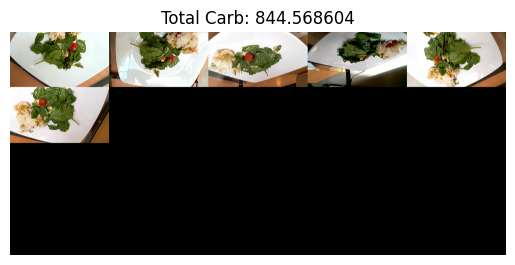

Combined Image Path: /root/.cache/kagglehub/datasets/zygmuntyt/nutrition5k-dataset-side-angle-images/versions/2/dish_1551389551/frames_sampled30/dish_1551389551_combined.jpeg, Total Carb: 732.300049


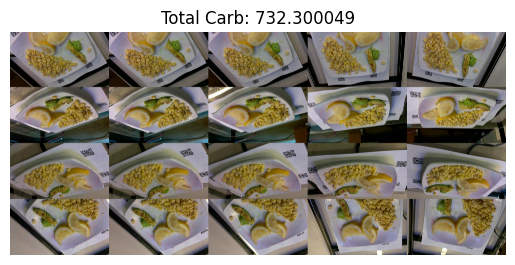

Combined Image Path: /root/.cache/kagglehub/datasets/zygmuntyt/nutrition5k-dataset-side-angle-images/versions/2/dish_1551389588/frames_sampled30/dish_1551389588_combined.jpeg, Total Carb: 732.300049


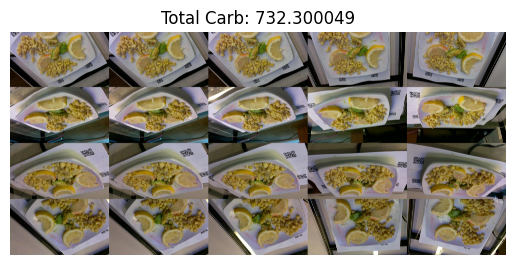

Combined Image Path: /root/.cache/kagglehub/datasets/zygmuntyt/nutrition5k-dataset-side-angle-images/versions/2/dish_1551389458/frames_sampled30/dish_1551389458_combined.jpeg, Total Carb: 717.660034


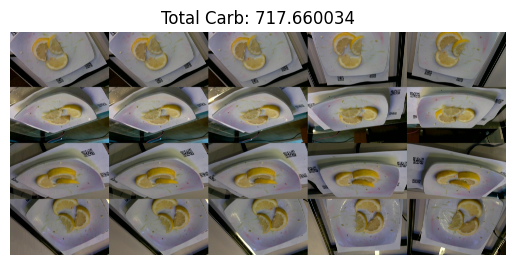

Combined Image Path: /root/.cache/kagglehub/datasets/zygmuntyt/nutrition5k-dataset-side-angle-images/versions/2/dish_1551567604/frames_sampled30/dish_1551567604_combined.jpeg, Total Carb: 506.07901


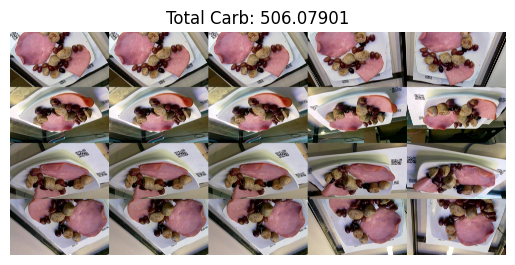

In [14]:
# prompt: I want you to write a code in which I can see the top 5 combined_image with their respective total_carb

import matplotlib.pyplot as plt
# Assuming df is already loaded and processed as in the previous code

# Sort the DataFrame by 'total_carb' in descending order and get the top 5
top_5_combined_images = df.sort_values(by='total_carb', ascending=False).head(5)

# Display the top 5 combined images with their total_carb
for index, row in top_5_combined_images.iterrows():
    print(f"Combined Image Path: {row['combined_image_path']}, Total Carb: {row['total_carb']}")
    # Optionally, display the image using matplotlib or PIL
    try:
        img = Image.open(row['combined_image_path'])
        plt.imshow(img)
        plt.title(f"Total Carb: {row['total_carb']}")
        plt.axis('off')
        plt.show()
    except FileNotFoundError:
        print(f"Image file not found: {row['combined_image_path']}")


In [11]:
IMG_SIZE = 224  # ViT input size
AUTOTUNE = tf.data.experimental.AUTOTUNE

def augment_image(image):
    """Applies random augmentations to the image."""
    image = tf.image.random_flip_left_right(image)  # Random horizontal flip
    image = tf.image.random_brightness(image, max_delta=0.2)  # Adjust brightness
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)  # Adjust contrast
    # Add other augmentations as needed (e.g., rotation, zoom)
    return image

def preprocess_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = tf.image.convert_image_dtype(image, tf.float32)

    # Apply augmentations during training
    image = tf.cond(tf.random.uniform(()) > 0.5, lambda: augment_image(image), lambda: image)

    return image, label

def prepare_dataset(df, batch_size=32, buffer_size=1000, is_training=False):
    image_paths = df['combined_image_path'].tolist()
    labels = df['total_carb'].tolist()

    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    dataset = dataset.map(preprocess_image, num_parallel_calls=AUTOTUNE)
    dataset = dataset.cache()

    # Shuffle and augment only during training
    if is_training:
        dataset = dataset.shuffle(buffer_size=buffer_size)

    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=AUTOTUNE)
    return dataset

# Split data
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Create datasets, specifying is_training=True for training set
train_dataset = prepare_dataset(train_df, is_training=True)
val_dataset = prepare_dataset(val_df)  # No augmentation for validation
test_dataset = prepare_dataset(test_df)  # No augmentation for testing

In [1]:
! pip install vit-keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.4 MB/s eta 0:00:00


In [2]:
!pip install tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 11.6 MB/s eta 0:00:00


In [3]:
! pip install tensorflow==2.15.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 879.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.3
    Uninstalling protobuf-5.29.3:
      Successfully uninstalled protobuf-5.29.3
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successful

In [12]:

from tensorflow import keras
from vit_keras import vit

vit_model = vit.vit_b16(
    image_size=IMG_SIZE,
    pretrained=True,
    include_top=False,
    pretrained_top=False
)


inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = vit_model(inputs)


outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

/usr/local/lib/python3.11/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


347502902/347502902 [==============================] - 3s 0us/step


/usr/local/lib/python3.11/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 14, 14
  warnings.warn(


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vit-b16 (Functional)        (None, 768)               85798656  
                                                                 
 dense (Dense)               (None, 1)                 769       
                                                                 
Total params: 85799425 (327.30 MB)
Trainable params: 85799425 (327.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard

# ... (model creation and other code) ...

# Compile the model before training
model.compile(optimizer='adam',  # Choose an optimizer (e.g., 'adam', 'sgd')
              loss='mse',       # Choose a loss function (e.g., 'mse', 'mae')
              metrics=['mae'])   # Choose metrics to track (e.g., 'mae', 'accuracy')

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    filepath='best_model.h5',  # Save the best model to this file
    monitor='val_loss',          # Monitor validation loss
    save_best_only=True,      # Save only the best model
    save_weights_only=False,   # Save the entire model (not just weights)
    verbose=1                  # Print messages when saving the model
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',        # Monitor validation loss
    factor=0.2,                # Factor by which to reduce the learning rate
    patience=3,                # Number of epochs with no improvement before reducing LR
    verbose=1                  # Print messages when reducing LR
)

tensorboard_callback = TensorBoard(
    log_dir='./logs',           # Directory to store TensorBoard logs
    histogram_freq=1,          # Frequency (in epochs) to compute activation histograms
    write_graph=True,          # Whether to visualize the graph in TensorBoard
    write_images=True          # Whether to write model weights to visualize as images in TensorBoard
)

# Train the model with callbacks
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=val_dataset,
    callbacks=[early_stopping, model_checkpoint, reduce_lr, tensorboard_callback]
)

Epoch 1/50
93/93 [==============================] - ETA: 0s - loss: 926.7662 - mae: 13.3102
Epoch 1: val_loss improved from inf to 1162.45496, saving model to best_model.h5


/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


93/93 [==============================] - 753s 8s/step - loss: 926.7662 - mae: 13.3102 - val_loss: 1162.4550 - val_mae: 12.7991 - lr: 0.0010
Epoch 2/50
93/93 [==============================] - ETA: 0s - loss: 919.4954 - mae: 13.2369
Epoch 2: val_loss did not improve from 1162.45496
93/93 [==============================] - 668s 7s/step - loss: 919.4954 - mae: 13.2369 - val_loss: 1165.7604 - val_mae: 12.6809 - lr: 0.0010
Epoch 3/50
93/93 [==============================] - ETA: 0s - loss: 909.0589 - mae: 13.1281
Epoch 3: val_loss did not improve from 1162.45496
93/93 [==============================] - 663s 7s/step - loss: 909.0589 - mae: 13.1281 - val_loss: 1163.1796 - val_mae: 12.1882 - lr: 0.0010
Epoch 4/50
32/93 [=========>....................] - ETA: 6:46 - loss: 1433.7944 - mae: 14.0574

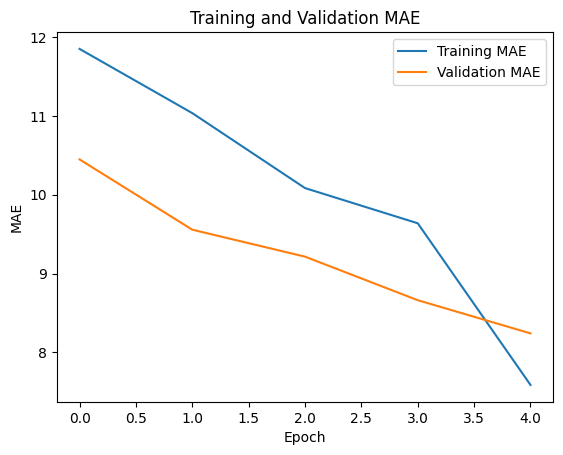

In [ ]:
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Training and Validation MAE')
plt.show()


In [ ]:


import numpy as np

results = model.evaluate(test_ds)


print("Test Loss:", results[0])
print("Test MAE:", results[1])



predictions = model.predict(test_ds)

true_values = test_df['total_carb'].values


mape = np.mean(np.abs((true_values - predictions.flatten()) / true_values)) * 100

print(f"Mean Absolute Percentage Error (MAPE) on the test dataset: {mape:.2f}%")


44/44 [==============================] - 154s 3s/step - loss: 469.9777 - mae: 8.2972
Test Loss: 469.9776611328125
Test MAE: 8.29715347290039
44/44 [==============================] - 162s 4s/step
Mean Absolute Percentage Error (MAPE) on the test dataset: inf%


<ipython-input-12-8af1c7d63195>:25: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((true_values - predictions.flatten()) / true_values)) * 100
